In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import operator
import numpy as np
import os
print(os.getcwd())

In [2]:
data_users = pd.read_csv('../2parcial/users_datasetGUAYAQUIL.csv')
data_tweets = pd.read_csv('../2parcial/tweets_datasetGUAYAQUIL.csv')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_users.head()

,screen_name,following,followers,favourites_count,verified,statuses_count,id_str,created_at
0,gellibert,611,580,2027,False,23661,282674192,Fri Apr 15 17:36:43 +0000 2011
1,matubupe,1036,225,2602,False,5068,255671525,Mon Feb 21 20:50:35 +0000 2011
2,LitoHeleno,886,3533,41256,False,75155,701336744,Tue Jul 17 16:22:48 +0000 2012
3,AlejaRamrez,225,48,73,False,133,563265562,Wed Apr 25 23:11:04 +0000 2012
4,gabrielacueva,156,157,12,False,722,106171247,Mon Jan 18 18:36:01 +0000 2010


In [4]:
data_tweets.head()

,screen_name,tweet,favorite_count,retweet_count,reply_to,n_user_mentions,n_hashtags,n_urls,user_mentions,hashtags,created_at
0,gellibert,@calleGerardo Mena,0,0,calleGerardo,1.0,0.0,0.0,calleGerardo,NaN,Sat Jun 29 00:26:14 +0000 2019
1,matubupe,@saramar0813 @FCFSeleccionCol Colombia con 10 ...,0,0,saramar0813,2.0,0.0,0.0,saramar0813;FCFSeleccionCol,NaN,Sat Jun 29 00:26:55 +0000 2019
2,LitoHeleno,DE SNAPCHAT TE BORRÉ DE FACEBOOK TE BORRÉ DE...,0,0,NaN,1.0,0.0,0.0,sanbenito,NaN,Sat Jun 29 00:27:29 +0000 2019
3,AlejaRamrez,💛💙❤ https://t.co/xneGeHbK8f,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 00:27:34 +0000 2019
4,gabrielacueva,https://t.co/uDuOkZstgt,0,0,NaN,0.0,0.0,0.0,NaN,NaN,Sat Jun 29 00:27:41 +0000 2019


In [5]:
data_tweets.groupby('screen_name').count().sort_values(by='reply_to', ascending=False).head()

,tweet,favorite_count,retweet_count,reply_to,n_user_mentions,n_hashtags,n_urls,user_mentions,hashtags,created_at
screen_name,,,,,,,,,,
jualomal2,958,958,958,958,958,958,958,958,0,958
jekillsreturn,1358,1358,1358,753,1358,1358,1358,801,195,1358
gallardogerman,1312,1312,1312,731,1312,1312,1312,779,14,1312
GaetanoLoHace,782,782,782,681,782,782,782,623,5,782
daviru3,791,791,791,649,791,791,791,639,2,791


In [6]:
data_users.sort_values(by='followers', ascending=False).head()

,screen_name,following,followers,favourites_count,verified,statuses_count,id_str,created_at
10912,Flamengo,77,5798529,174,True,224845,59591856,Thu Jul 23 21:19:02 +0000 2009
4038,malditaternura,1861,3656701,11853,True,44848,261955501,Mon Mar 07 01:51:30 +0000 2011
3233,rmapalacios,93,2895010,532,True,85579,119174866,Tue Mar 02 22:06:08 +0000 2010
4816,Refugees,1428,2288991,26705,True,64154,14361155,Fri Apr 11 14:23:51 +0000 2008
1221,Capital967,813,2158808,2990,False,134534,21889656,Wed Feb 25 17:18:54 +0000 2009


In [7]:
users_followers = data_users[['screen_name', 'followers']]

In [8]:
users_reply = data_tweets[['screen_name', 'reply_to']]

In [9]:
users_reply = users_reply.dropna()

In [10]:
merge = pd.merge(users_reply, users_followers, how='inner')

In [11]:
merge.columns = ['screen_name', 'reply_to', 'weight']

In [12]:
merge.head(10)

,screen_name,reply_to,weight
0,gellibert,calleGerardo,580
1,gellibert,AlvaroRiera24,580
2,gellibert,RIVAUL10_,580
3,gellibert,AlejandroSelDel,580
4,gellibert,mariapazza,580
5,gellibert,bonillaportilla,580
6,gellibert,AlvaroRiera24,580
7,gellibert,Jorge_andres_s,580
8,gellibert,AndresPonce28,580
9,gellibert,mariajoseaz20,580


In [13]:
len(merge)

93211

In [14]:
G = nx.from_pandas_edgelist(merge.head(1500), source='screen_name', target='reply_to', edge_attr=['weight'])
posG = nx.spring_layout(G)

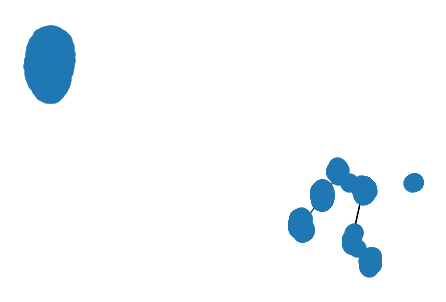

In [16]:
nx.draw(G)
plt.show()

In [17]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

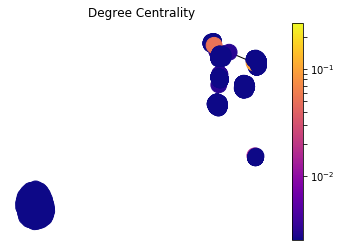

In [18]:
draw(G, posG, nx.degree_centrality(G), 'Degree Centrality')

In [19]:
stats = nx.degree_centrality(G)
max(stats.items(), key=operator.itemgetter(1))[0]

'ccarrasco750'

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/matplotlib/colorbar.py:1042: RuntimeWarning: invalid value encountered in true_divide
  z = np.take(y, i0) + (xn - np.take(b, i0)) * dy / db
/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/matplotlib/transforms.py:402: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


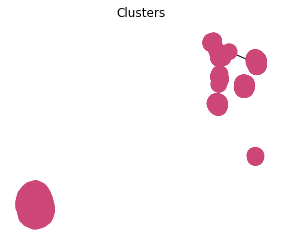

In [20]:
draw(G, posG, nx.clustering(G), 'Clusters')

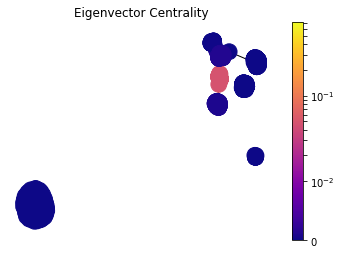

In [21]:
draw(G, posG, nx.eigenvector_centrality(G), 'Eigenvector Centrality')

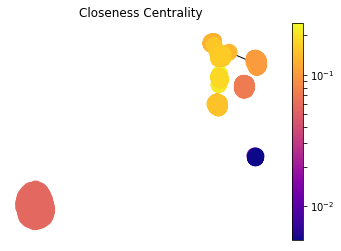

In [22]:
draw(G, posG, nx.closeness_centrality(G), 'Closeness Centrality')

In [23]:
stats = nx.closeness_centrality(G)
max(stats.items(), key=operator.itemgetter(1))[0]

'ccarrasco750'

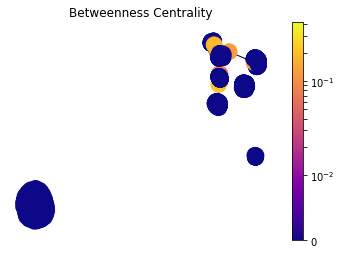

In [24]:
draw(G, posG, nx.betweenness_centrality(G), 'Betweenness Centrality')

In [25]:
eigen_centrality = nx.eigenvector_centrality(G)
all_nodes = [(node,eigen_centrality[node]) for node in eigen_centrality]

In [26]:
node_colours = []
for node in all_nodes:
    if node[1] < 0.05:
        node_colours.append('blue')
    else:
        node_colours.append('green')

In [27]:
node_colours.count('green')

1

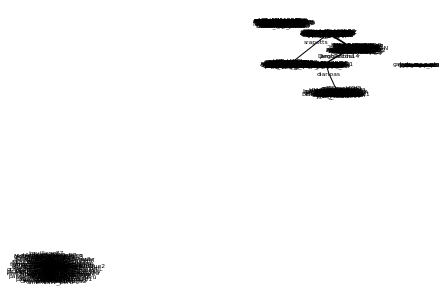

In [28]:
nx.draw_spring(G, k =1, node_color = node_colours,
               node_size = [eigen_centrality[n] for n in G.nodes()], 
               font_size = 6, with_labels = True)

In [ ]:
merge.head()

In [ ]:
merge['screen_name'].value_counts()[:100]